<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,0.040214,157.479304,157.441416,0.037888
1,0.0,1.0,95.145814,36.678058,32.755933,0.172188,174.751993,174.518875,0.233118
2,0.0,2.0,60.443735,47.585077,69.899609,0.221711,188.150132,187.904222,0.245910
3,0.0,3.0,31.749471,39.444064,81.196086,-0.216651,162.172970,162.385010,-0.212041
4,0.0,4.0,75.571924,28.101242,59.999407,0.088393,173.760965,173.626361,0.134604
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-0.354028,157.896408,158.257624,-0.361216
59996,999.0,56.0,64.963417,65.855822,20.013285,0.324358,161.156882,160.850682,0.306200
59997,999.0,57.0,28.983831,65.042478,32.769278,-0.224001,136.571586,136.813914,-0.242328
59998,999.0,58.0,92.143225,62.373276,34.331948,0.130183,198.978632,198.857329,0.121302


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,0.040214,157.479304,157.441416,0.037888
1,0.0,1.0,95.145814,36.678058,32.755933,0.172188,174.751993,174.518875,0.233118
2,0.0,2.0,60.443735,47.585077,69.899609,0.221711,188.150132,187.904222,0.245910
3,0.0,3.0,31.749471,39.444064,81.196086,-0.216651,162.172970,162.385010,-0.212041
4,0.0,4.0,75.571924,28.101242,59.999407,0.088393,173.760965,173.626361,0.134604
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-0.354028,157.896408,158.257624,-0.361216
59996,999.0,56.0,64.963417,65.855822,20.013285,0.324358,161.156882,160.850682,0.306200
59997,999.0,57.0,28.983831,65.042478,32.769278,-0.224001,136.571586,136.813914,-0.242328
59998,999.0,58.0,92.143225,62.373276,34.331948,0.130183,198.978632,198.857329,0.121302


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    21.640995  34.925259  90.872835  ...  157.479304  157.441416  0.037888
      1.0    95.145814  36.678058  32.755933  ...  174.751993  174.518875  0.233118
      2.0    60.443735  47.585077  69.899609  ...  188.150132  187.904222  0.245910
      3.0    31.749471  39.444064  81.196086  ...  162.172970  162.385010 -0.212041
      4.0    75.571924  28.101242  59.999407  ...  173.760965  173.626361  0.134604
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   27.655950  26.943522  93.650964  ...  157.896408  158.257624 -0.361216
      56.0   64.963417  65.855822  20.013285  ...  161.156882  160.850682  0.306200
      57.0   28.983831  65.042478  32.769278  ...  136.571586  136.813914 -0.242328
      58.0   92.143225  62.373276  34.331948  ...  198.978632  198.857329  0.121302
      59.0   23.025996  28.855452  24.490296  ...   86.243466   86.410341 -0.166875

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    21.640995  34.925259  90.872835  ...  157.479304  157.441416  0.037888
      1.0    95.145814  36.678058  32.755933  ...  174.751993  174.518875  0.233118
      2.0    60.443735  47.585077  69.899609  ...  188.150132  187.904222  0.245910
      3.0    31.749471  39.444064  81.196086  ...  162.172970  162.385010 -0.212041
      4.0    75.571924  28.101242  59.999407  ...  173.760965  173.626361  0.134604
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   27.655950  26.943522  93.650964  ...  157.896408  158.257624 -0.361216
      56.0   64.963417  65.855822  20.013285  ...  161.156882  160.850682  0.306200
      57.0   28.983831  65.042478  32.769278  ...  136.571586  136.813914 -0.242328
      58.0   92.143225  62.373276  34.331948  ...  198.978632  198.857329  0.121302
      59.0   23.025996  28.855452  24.490296  ...   86.243466   86.410341 -0.166875

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,0.040214,157.479304,157.441416,0.037888
1,0.0,1.0,95.145814,36.678058,32.755933,0.172188,174.751993,174.518875,0.233118
2,0.0,2.0,60.443735,47.585077,69.899609,0.221711,188.150132,187.904222,0.245910
3,0.0,3.0,31.749471,39.444064,81.196086,-0.216651,162.172970,162.385010,-0.212041
4,0.0,4.0,75.571924,28.101242,59.999407,0.088393,173.760965,173.626361,0.134604
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-0.354028,157.896408,158.257624,-0.361216
59996,999.0,56.0,64.963417,65.855822,20.013285,0.324358,161.156882,160.850682,0.306200
59997,999.0,57.0,28.983831,65.042478,32.769278,-0.224001,136.571586,136.813914,-0.242328
59998,999.0,58.0,92.143225,62.373276,34.331948,0.130183,198.978632,198.857329,0.121302


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    21.640995  34.925259  90.872835  ...  157.479304  157.441416  0.037888
      1.0    95.145814  36.678058  32.755933  ...  174.751993  174.518875  0.233118
      2.0    60.443735  47.585077  69.899609  ...  188.150132  187.904222  0.245910
      3.0    31.749471  39.444064  81.196086  ...  162.172970  162.385010 -0.212041
      4.0    75.571924  28.101242  59.999407  ...  173.760965  173.626361  0.134604
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   27.655950  26.943522  93.650964  ...  157.896408  158.257624 -0.361216
      56.0   64.963417  65.855822  20.013285  ...  161.156882  160.850682  0.306200
      57.0   28.983831  65.042478  32.769278  ...  136.571586  136.813914 -0.242328
      58.0   92.143225  62.373276  34.331948  ...  198.978632  198.857329  0.121302
      59.0   23.025996  28.855452  24.490296  ...   86.243466   86.410341 -0.166875

[60000 rows x 7 columns]

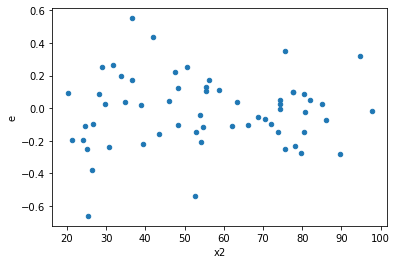

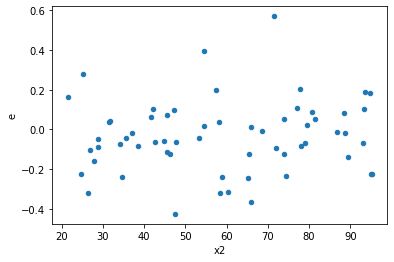

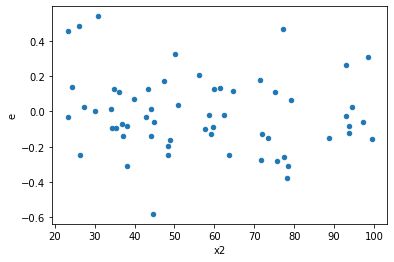

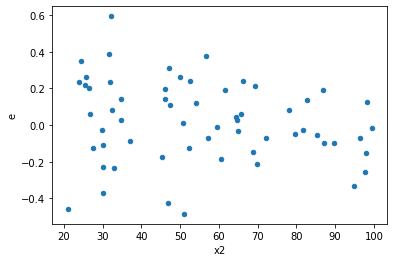

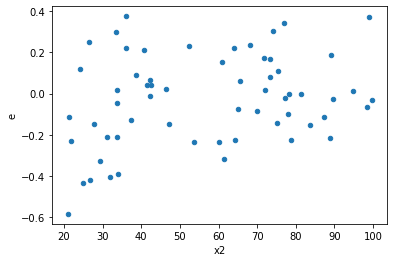

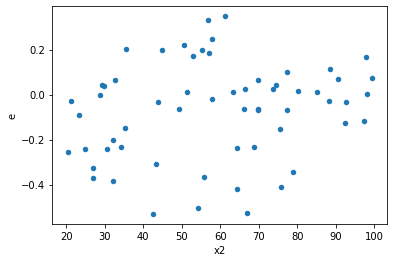

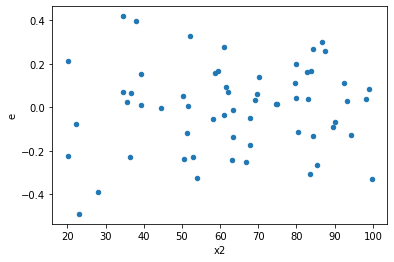

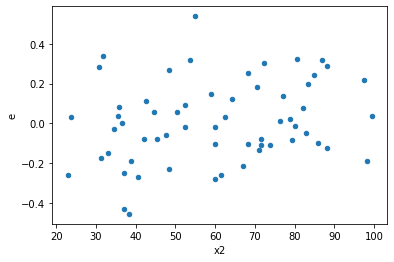

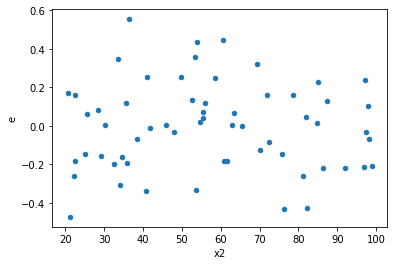

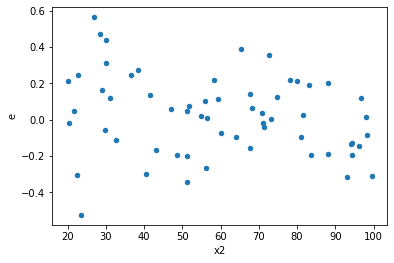

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,21.0,21.0,0.5114433716311778,0.7970746851254032,0.024354446268151326,0.03795593738692397,1.5584808198476479,0.3170116601655184,0.8414941699172408,0.1585058300827592,Reject001=1 : Homoscedasticity
12.0,21.0,21.0,0.44779102437161256,0.5330710492900896,0.02132338211293393,0.025384335680480458,1.190446034594264,0.6932384323553997,0.6533807838223001,0.34661921617769986,Reject001=1 : Homoscedasticity
26.0,21.0,21.0,0.6186428290009132,0.6319698690680697,0.029459182333376816,0.030093803288955702,1.0215423818759515,0.9615110380914942,0.5192444809542529,0.4807555190457471,Reject001=1 : Homoscedasticity
77.0,21.0,21.0,0.34182822244283934,0.40244950476317176,0.016277534402039967,0.019164262131579606,1.1773442868090551,0.7117916589697262,0.6441041705151369,0.3558958294848631,Reject001=1 : Homoscedasticity
79.0,21.0,21.0,0.4009187884348237,0.7673817320891619,0.01909137087784875,0.03654198724234105,1.9140577948092676,0.1449763235115462,0.9275118382442269,0.0724881617557731,Reject001=1 : Homoscedasticity
92.0,21.0,21.0,0.7602987617529798,0.7619626247699809,0.03620470294061809,0.036283934512856234,1.0021884331537838,0.996050808627746,0.501974595686127,0.498025404313873,Reject001=1 : Homoscedasticity
96.0,21.0,21.0,0.5356077210213301,0.7180643953443633,0.02550512957244429,0.03419354263544587,1.3406535551338084,0.5075911697646776,0.7462044151176612,0.2537955848823388,Reject001=1 : Homoscedasticity
110.0,21.0,21.0,0.6951844788557906,0.7015517255910564,0.033104022802656695,0.03340722502814554,1.0091590749346786,0.9835301291114678,0.5082349354442661,0.4917650645557339,Reject001=1 : Homoscedasticity
114.0,21.0,21.0,0.9757990480500938,1.028321769481253,0.04646662133571875,0.048967703308631094,1.0538253460444684,0.9055154355060362,0.5472422822469819,0.4527577177530181,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1.3970961290342359,0.5800350486608804,0.06652838709686837,0.027620716602899067,0.4151718959108695,0.04999460402764786,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,0.5114433716311778,0.7970746851254032,0.024354446268151326,0.03795593738692397,1.5584808198476479,0.3170116601655184,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,1.0188313798687956,0.8041361874694993,0.04851577999375217,0.03829219940330949,0.7892730861637334,0.5925204441995505,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,1.5377874125637512,0.4019328784419092,0.07322797202684529,0.019139660878186155,0.26137089896699006,0.0033281849296859663,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,1.1381838216173545,0.588882201572645,0.054199229600826404,0.028042009598697383,0.5173876050494601,0.13914164709269217,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,0.7647755381964425,0.5231224917319084,0.036417882771259166,0.02491059484437659,0.6840209520372207,0.3912627869882385,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,1.243487480147376,0.6355741812159513,0.05921368953082743,0.03026543720075959,0.5111223002748884,0.13210385904669245,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,0.9322090629744207,0.524522781217083,0.0443909077606867,0.02497727529605157,0.5626664683386322,0.19588696466475702,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,1.0822865834403719,0.8896727952773956,0.05153745635430342,0.042365371203685505,0.8220306976820356,0.6574916641095461,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      849
Reject001=0 : Heteroscedasticity    151
Name: Result_test, dtype: int64